In [1]:
from typing import Optional, List
from importlib import reload

import pandas as pd

from data import build_dataset_with_composites #, get_yf_returns, get_factor_master, get_portfolios, get_factor_data, get_yf_data
# from stats import get_volatility_set, get_correlation_set
from util import xr_pct_change #, safe_reindex

from corr_mds import *

In [2]:
halflifes = [21, 63, 126, 252]
factor_data = build_dataset_with_composites(halflifes)

[*********************100%%**********************]  55 of 55 completed


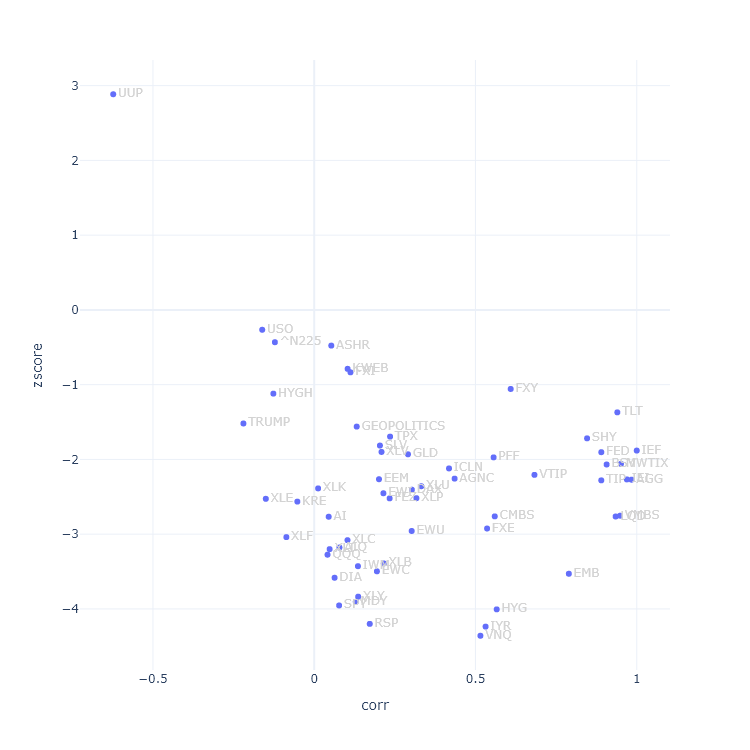

In [ ]:
return_date = '2024-12-18'
corr_type = 63
corr_asset = 'IEF'
vol_type = 63

corr = factor_data.corr.sel(date=return_date, corr_type=corr_type, asset_1=corr_asset).to_series()
vol = factor_data.vol.shift(date=1).sel(date=return_date, vol_type=vol_type).to_series() / sqrt(252)
ret = factor_data.ret.sel(date=return_date).to_series() * 100



# factor_data.vol.sel(vol_type=vol_type, asset='SPY', date=slice('2024', None)).to_series().plot()

zscore = ret.div(vol).rename('zscore')


# fig_format = {'template': 'plotly_white', 'height': 750, 'width': 750}
# df = pd.concat([corr, zscore], axis=1).reset_index()
# fig = (px.scatter(df, x='corr', y='zscore', text='asset', **fig_format)
#        .update_traces(textposition='middle right', 
#                       textfont_color='lightgray')
#        .update_layout(# xaxis_title=None,
#                       # yaxis_title=None,
#                       # xaxis_showticklabels=False,
#                       # yaxis_showticklabels=False,
#                       # xaxis_showgrid=False,
#                       # yaxis_showgrid=False,
#                       xaxis_showline=False,
#                       yaxis_showline=False,
#                       legend_title_text=None,
#                       )
#        )



# fig.show(renderer='png') # , log_x=True


# factor_data['zscore'] = factor_data.ret / factor_data.vol.shift(date=1)

# zscore = factor_data.zscore.sel(date=return_date, vol_type=63)
# factor_data.vol.sel(vol_type=21).shift(date=1).to_pandas().sort_index(ascending=False).to_clipboard()
# factor_data.vol.sel(vol_type=21).shift(date=0).to_pandas().sort_index(ascending=False).to_clipboard()

In [4]:
# def px_line(da: xr.DataArray, x: str, y: str, color: Union[str, None] = None, title: Union[str, None] = None, 
#             x_title: bool = False, y_title: bool = False, fig_format: Union[dict, None] = None) -> Figure:
#     fig_format_default = {'template': 'plotly_white', 'height': 500, 'width': 1000}
#     fig_format = {**fig_format_default, **(fig_format or {})}
#     df = da.to_series().reset_index()
#     fig = px.line(df, x=x, y=y, color=color, title=title, **fig_format)
#     fig = px_format(fig, x_title=x_title, y_title=y_title)
    
#     return fig

In [5]:
from data import get_factor_master
factor_master = get_factor_master()
factor_master

,asset_class,region,hyper_factor,composite,description
factor_name,,,,,
SPY,Equities,USD,1,0,S&P 500
IWM,Equities,USD,0,0,Russell 2000
MDY,Equities,USD,0,0,S&P 400
RSP,Equities,USD,0,0,S&P 500 EW
QQQ,Equities,USD,0,0,Nasdaq 100
DIA,Equities,USD,0,0,Dow Jones 30
XLK,Sector,USD,0,0,Technology
XLI,Sector,USD,0,0,Industrials
XLF,Sector,USD,0,0,Financials


In [60]:
(pd.concat([corr, zscore, factor_master.asset_class, factor_master.hyper_factor], axis=1)
.rename_axis('asset').reset_index()
.replace('MWTIX', 'TCW')
)

,asset,corr,zscore,asset_class,hyper_factor
0,SPY,-0.002845,-2.824277,Equities,1
1,IWM,0.071692,-2.667137,Equities,0
2,MDY,0.056401,-2.891811,Equities,0
3,RSP,0.100406,-3.302967,Equities,0
4,QQQ,-0.029281,-2.601348,Equities,0
5,DIA,-0.010694,-2.462478,Equities,0
6,XLK,-0.041161,-1.632205,Sector,0
7,XLI,-0.019575,-2.365977,Sector,0
8,XLF,-0.161865,-1.892982,Sector,0
9,KRE,-0.113210,-2.120357,Sector,0


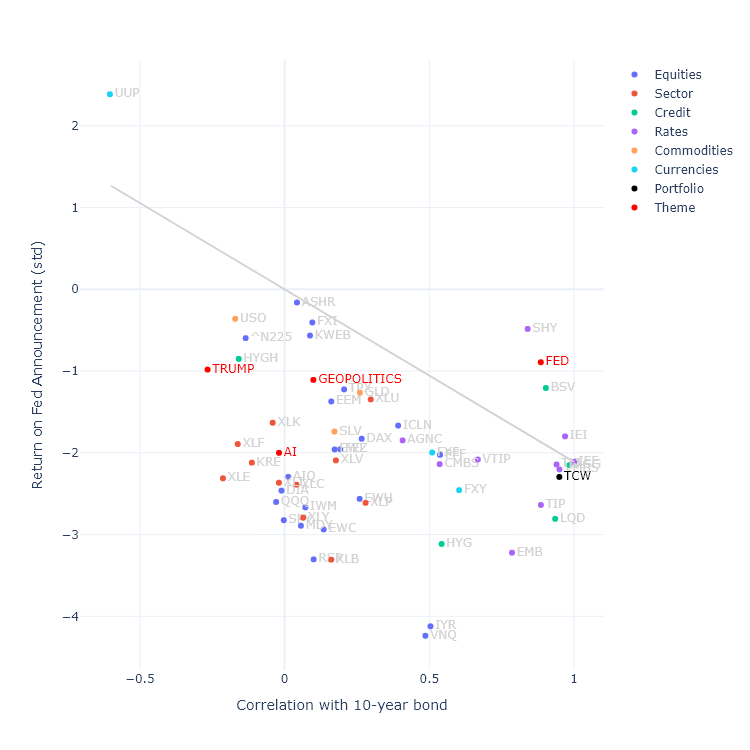

In [65]:
import plotly.io as pio
from data import get_factor_master

return_date = '2024-12-18'
return_date2 = '2024-12-19'
corr_type = 63
corr_asset = 'IEF'
vol_type = 63

corr = factor_data.corr.shift(date=1).sel(date=return_date, corr_type=corr_type, asset_1=corr_asset).to_series()
vol = factor_data.vol.shift(date=1).sel(date=return_date, vol_type=vol_type).to_series() * sqrt(2 / 252)
ret = (factor_data.ret.sel(date=return_date).to_series() * 100) + (factor_data.ret.sel(date=return_date2).to_series() * 100)
zscore = ret.div(vol).rename('zscore')

factor_master = get_factor_master()

df = (pd.concat([corr, zscore, factor_master.asset_class, factor_master.hyper_factor], axis=1)
      .replace('MWTIX', 'TCW')
      .rename_axis('asset').reset_index()
      .replace('MWTIX', 'TCW')
    #   .assign(size = lambda df: df['hyper_factor'].apply(lambda x: 10 if x == 1 else 1).astype('float'))
      )
df['textcolor'] = ['black' if asset == 'SPY' else 'lightgray' for asset in df['asset']]


def override_color_sequence(map):
    asset_class_list = df.asset_class.unique()
    color_sequence = pio.templates['plotly_white']['layout']['colorway']
    color_dict = {a: b for a, b in zip(asset_class_list, color_sequence)}
    return {**color_dict, **map}

color_sequence = override_color_sequence({'Portfolio': 'black', 'Theme': 'red'})


def px_scatter(df, x, y, text=None, color=None, size=None, symbol=None, color_sequence_override=None):
    args_format = {'template': 'plotly_white', 'height': 750, 'width': 750}

    # TODO: Refactor to get_color_map() function
    if (color is None) or (color_sequence_override is None):
        color_discrete_map = None
    else:
        color_keys = df[color].unique()
        color_sequence = pio.templates[args_format['template']]['layout']['colorway']
        color_dict = {a: b for a, b in zip(color_keys, color_sequence)}
        color_discrete_map = {**color_dict, **color_sequence_override}

    fig = (px.scatter(df, x=x, y=y, text=text, color=color, size=size, symbol=symbol, 
                      color_discrete_map=color_discrete_map,
                      size_max=20,
                      **args_format)
           .update_traces(textposition='middle right', textfont_color='lightgray')
           .update_layout(legend_title_text=None)
           )

    def get_trace_color(trace, legendgroup):
        return trace.marker.color if trace.legendgroup in legendgroup else 'lightgray'

    asset_class_list = color_sequence_override.keys()
    fig.for_each_trace(lambda t: t.update(textfont_color = get_trace_color(t, asset_class_list)))

    return fig


color_map_override = {'Portfolio': 'black', 
                      'Theme':     'red'}
fig = (px_scatter(df, x='corr', y='zscore', text='asset', color='asset_class', #size='size',
                 color_sequence_override = color_map_override)
       .update_layout(yaxis_title='Return on Fed Announcement (std)',
                      xaxis_title='Correlation with 10-year bond'
                      ))

fig.add_shape(
    type="line",
    x0=df[df['asset'] == 'IEF']['corr'].values[0] * -0.6,
    y0=df[df['asset'] == 'IEF']['zscore'].values[0] * -0.6,
    x1=df[df['asset'] == 'IEF']['corr'].values[0],
    y1=df[df['asset'] == 'IEF']['zscore'].values[0],
    line=dict(color="lightgray", width=2)
)


fig.show(renderer='png')
fig.write_html('fed_feedback.html')
fig.write_html('fed_feedback.png')


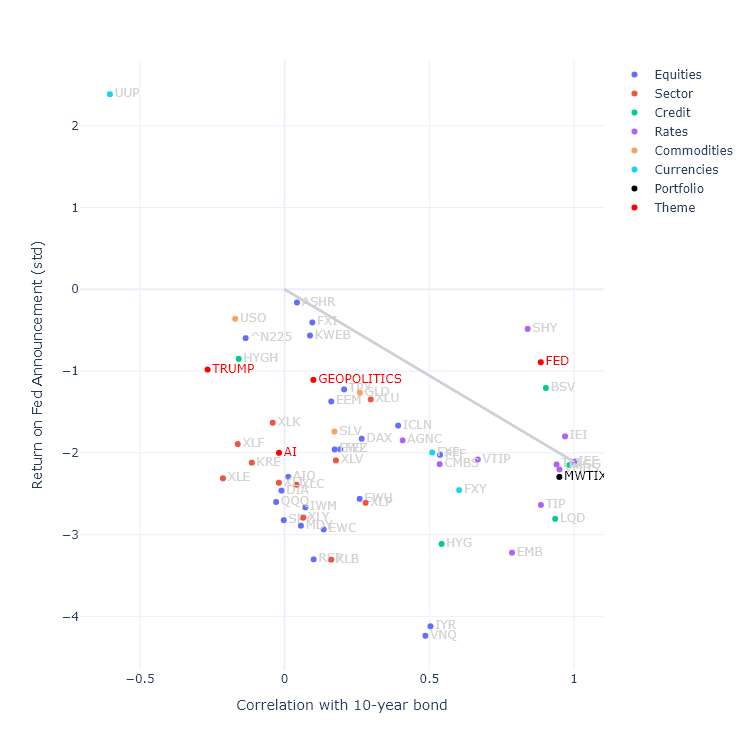

In [48]:
fig.add_shape(
    type="line",
    x0=0,
    y0=0,
    x1=df[df['asset'] == 'IEF']['corr'].values[0],
    y1=df[df['asset'] == 'IEF']['zscore'].values[0],
    line=dict(color="lightgray", width=2)
)

fig.show(renderer='png')

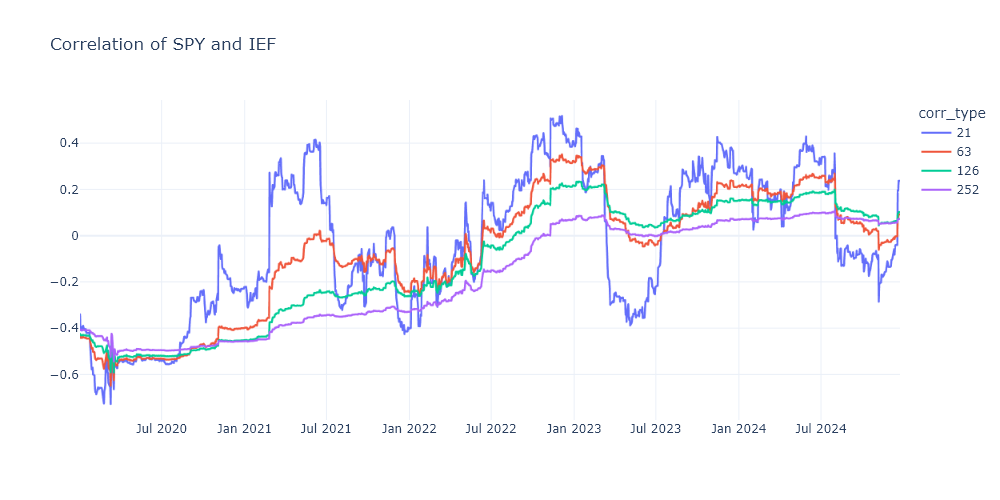

In [66]:
df1  = factor_data.sel(asset='SPY', asset_1='IEF', date=slice('2024', None)).corr.to_pandas().T.stack()

from chart import draw_correlation

fig1 = draw_correlation(factor_data.corr.sel(date=slice('2020', None)), 'SPY', 'IEF', [21, 63, 126, 252])
fig1.show(renderer='png')
fig.write_html('corr_ts.html')
fig.write_html('corr_ts.png')


In [10]:
color_map_override

{'Portfolio': 'black', 'Theme': 'red'}

In [11]:


factor_data.corr.sel(date=return_date, corr_type=corr_type, asset_1='IEF').to_pandas()

asset
SPY            0.077180
IWM            0.135574
MDY            0.128835
RSP            0.172093
QQQ            0.041219
DIA            0.063092
XLK            0.012051
XLI            0.047786
XLF           -0.086443
KRE           -0.052376
XLC            0.103189
XLE           -0.150117
XLY            0.136334
XLB            0.215645
XLV            0.208643
XLU            0.331904
XLP            0.316912
IYR            0.531273
VNQ            0.515290
AIQ            0.078184
ICLN           0.417925
PFF            0.556201
FEZ            0.233816
EWU            0.302247
DAX            0.302754
EWC            0.194386
EWI            0.214500
^N225         -0.121981
TPX            0.235160
FXI            0.112414
ASHR           0.052911
KWEB           0.103490
EEM            0.200821
LQD            0.934524
BSV            0.906616
HYG            0.565771
HYGH          -0.126738
AGG            0.983855
SHY            0.845963
IEI            0.969461
IEF            1.000000
TLT       

In [12]:
factor_data.zscore.sel()

AttributeError: 'Dataset' object has no attribute 'zscore'